In [15]:
import numpy as np
import pandas as pd
import statsrat as sr
from unpaired_shocks import renewal
from extn_rw_models import *
from plotnine import *

In [24]:
#model = refined
model = power_decay
#model = tdrva_decay_cfg2
#model = revised_CompAct
save_plots = True
perform_oat = False
print(model.pars)

par_vals = {'refined': [0.001, 0.2, 2.0, 5.0],
            'power_decay': [0.001, 0.2, 2.0, 5.0],
            'tdrva_decay_cfg2': [0.001, 0.25, 0.8, 1.0, 1.5, 5],
            'revised_CompAct': [0.01, 1.0, 0.1, 8.0, 1.0, 5]}

            min   max  default
drate       0.0   0.5     0.25
lrate_min   0.0   0.5     0.10
power       0.0   2.0     0.50
resp_scale  0.0  10.0     1.00


In [25]:
if perform_oat:
    oat_result = sr.perform_oat(experiment = renewal,
                                model = model,
                                minimize = False,
                                n = 1,
                                max_time = 60)
    print(np.round(oat_result[0], 4))
    print(np.round(oat_result[1], 4))

In [26]:
print('renewal after unpaired shocks during extinction \n')

trials = renewal.make_trials('unpaired_shocks')
ds_exp = model.simulate(trials, par_vals[model.name])

trials = renewal.make_trials('control')
ds_ctl = model.simulate(trials, par_vals[model.name])

print(renewal.oats['shocks_vs_none'].compute_total({'unpaired_shocks': ds_exp, 'control': ds_ctl}))
print(renewal.oats['shocks_vs_none'].mean_resp({'unpaired_shocks': ds_exp, 'control': ds_ctl}))

renewal after unpaired shocks during extinction 

0.21321191348965773
          schedule      trial_name u_name  mean_resp
0          control  cs1 -> nothing     us   0.823644
0  unpaired_shocks  cs1 -> nothing     us   0.610432


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 8 x 4 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_renewal_unpaired_shocks_b_power_decay.jpeg


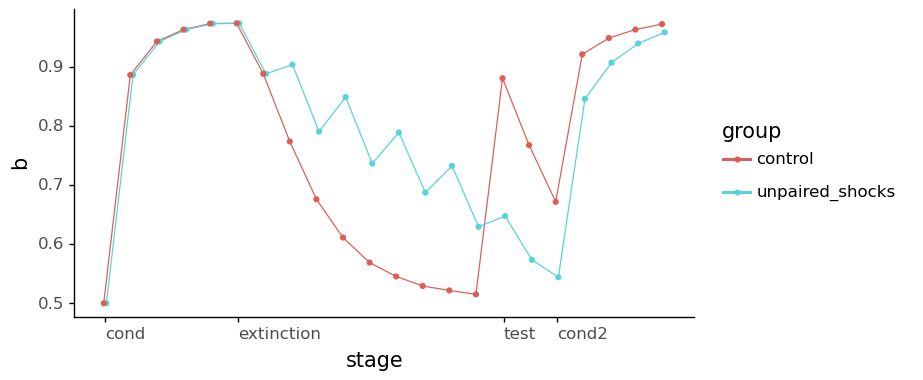

In [27]:
plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       draw_points = True,
                       sel = 2*[{'t': ds_exp['x'].loc[{'x_name': 'cs1'}] == 1}],
                       dodge_width = 0.2,
                       figure_size = (8, 4))
plot_b += theme(axis_text_x = element_text(ha = 'left'))
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_renewal_unpaired_shocks_b_' + model.name + '.jpeg', dpi = 300)

In [28]:
plot_w_comp = sr.multi_plot([ds_exp, ds_ctl],
                            var = 'w',
                            rename_coords = {'schedule': 'group', 'f_name': 'feature'},
                            figure_size = (8, 4),
                            sel = 2*[{'f_name': ['cs1', 'ctx_b', 'cs1.ctx_b'], 't': ds_exp['stage_name'].isin(['training', 'extinction'])}])
plot_w_comp += geom_hline(yintercept = 0, linetype = "dashed")
plot_w_comp += scale_x_continuous(breaks = [0, 25], labels = ['cond', 'extinction'], name = 'stage')
plot_w_comp += theme(axis_text_x = element_text(ha = 'left'))
plot_w_comp.draw()
if save_plots:
    plot_w_comp.save(filename = 'plots/rw_renewal_unpaired_shocks_w_comp_' + model.name + '.jpeg', dpi = 300)

KeyError: "not all values found in index 'f_name'"

In [ ]:
plot_w_elem = sr.learn_plot(ds_exp,
                            var = 'w',
                            rename_coords = {'f_name': 'feature'},
                            sel = {'f_name': ['cs1', 'cs2', 'ctx_a', 'ctx_b']})
plot_w_elem += geom_hline(yintercept = 0, linetype = "dashed")
plot_w_elem.draw()
if save_plots:
    plot_w_elem.save(filename = 'plots/rw_renewal_unpaired_shocks_w_elem_' + model.name + '.jpeg', dpi = 300)

In [ ]:
plot_w_cfg = sr.learn_plot(ds_exp,
                           var = 'w',
                           rename_coords = {'f_name': 'feature'},
                           sel = {'f_name': ['cs1.ctx_a', 'cs1.ctx_b', 'cs2.ctx_a']})
plot_w_cfg += geom_hline(yintercept = 0, linetype = "dashed")
plot_w_cfg.draw()
if save_plots:
    plot_w_cfg.save(filename = 'plots/rw_renewal_unpaired_shocks_w_cfg_' + model.name + '.jpeg', dpi = 300)

In [ ]:
print(ds_exp['stage_name'].values[25])